# Merging labels
In principle, all segmentation algorithms are limited. In case results are sub-optimal and no better segmentation algorithm is available, post-processing labels may be an option. There are some functions available for merging labels according to their properties such as intensity along the edge where labels touch the pixel count of pair-wise combined labels.

In [1]:
import pyclesperanto_prototype as cle
from napari_segment_blobs_and_things_with_membranes import local_minima_seeded_watershed
import numpy as np
cle.select_device("TX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

## Merging touching labels
The most trivial use-case might be merging labeled objects that touch.

cl.OCLArray([[ 0,  0,  0, ..., 68, 68, 68],
       [ 0,  0,  0, ..., 68, 68, 68],
       [ 0,  0,  0, ..., 68, 68, 68],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
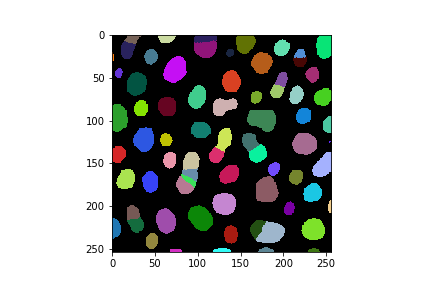

In [2]:
blobs = cle.imread("../../data/blobs.tif")
blobs_labels = cle.voronoi_otsu_labeling(blobs, spot_sigma=3)
blobs_labels

cl.OCLArray([[ 0,  0,  0, ..., 57, 57, 57],
       [ 0,  0,  0, ..., 57, 57, 57],
       [ 0,  0,  0, ..., 57, 57, 57],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
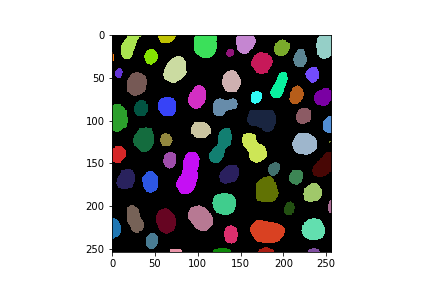

In [3]:
cle.merge_touching_labels(blobs_labels)

## Merging labels according to border intensity
As an example we use a cropped slice of the [`cells3d` example dataset in scikit-image](https://scikit-image.org/docs/stable/auto_examples/applications/plot_3d_image_processing.html).

cl.OCLArray([[2029., 2518., 2368., ..., 2248., 1888., 1804.],
       [2425., 2415., 2490., ..., 1814., 1977., 2062.],
       [2085., 2293., 2316., ..., 1909., 1789., 1820.],
       ...,
       [3677., 2483., 2423., ..., 2233., 2456., 2359.],
       [2859., 2527., 2547., ..., 1936., 2399., 2111.],
       [2859., 2541., 2510., ..., 2332., 2248., 2066.]], dtype=float32)
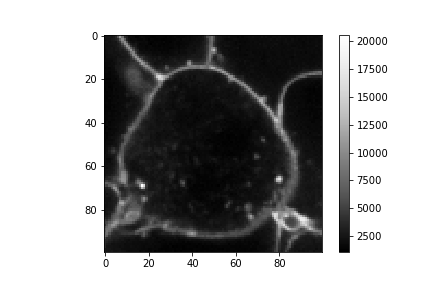
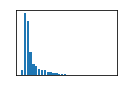

In [4]:
image = cle.imread("../../data/membranes_2d.tif")[30:130, 0:100]
image

In the following example, our cell in the center of the image was wrongly segmented as two cells:

StackViewNDArray([[ 5,  5,  5, ...,  3,  2,  2],
                  [ 5,  5,  5, ...,  3,  3,  2],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  ...,
                  [11, 11, 11, ..., 12, 12, 12],
                  [11, 11, 11, ..., 12, 12, 12],
                  [11, 11, 11, ..., 12, 12, 12]])
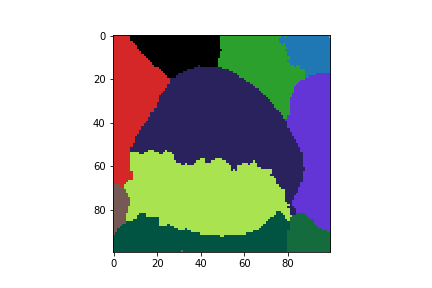

In [5]:
labels = local_minima_seeded_watershed(image, spot_sigma=5, outline_sigma=0)
labels

This can be corrected by merging cells with border intensity below a given threshold.

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier3\_generate_touch_mean_intensity_matrix.py:30: UserWarning: generate_touch_mean_intensity_matrix is supposed to work with images of integer type only.
Loss of information is possible when passing non-integer images.
  warnings.warn("generate_touch_mean_intensity_matrix is supposed to work with images of integer type only.\n" +


cl.OCLArray([[3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 2, 2],
       ...,
       [7, 7, 7, ..., 8, 8, 8],
       [7, 7, 7, ..., 8, 8, 8],
       [7, 7, 7, ..., 8, 8, 8]], dtype=uint32)
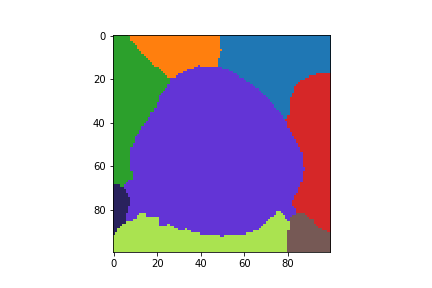

In [6]:
merged_labels = cle.merge_labels_with_border_intensity_within_range(image, labels, maximum_intensity=5000)
merged_labels